<a href="https://colab.research.google.com/github/toyo97/rgbd-domain-adaptation/blob/master/fixed%20best%20epoch" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
import time
import os
from getpass import getpass
import pickle
import matplotlib.pyplot as plt
import numpy as np

**Reimport a module (debug purpose)**

In [2]:
import importlib
importlib.reload(os)

<module 'os' from '/usr/lib/python3.6/os.py'>

# File loading
Get obj files for the plots

In [ ]:
since = time.time()
!apt install subversion
!svn checkout https://github.com/toyo97/rgbd-domain-adaptation/trunk/tuning

time_elapsed = time.time() - since
print('Time to load objects: {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

Best configuration found so far: {'dr': 1, 'weight_decay': 0.05, 'lr': 0.0003, 'entropy_weight': 0.1, 'weight_l2norm': 0.05, 'batch_size': 32} accuracy: 0.5213696268013303 epoch: 1


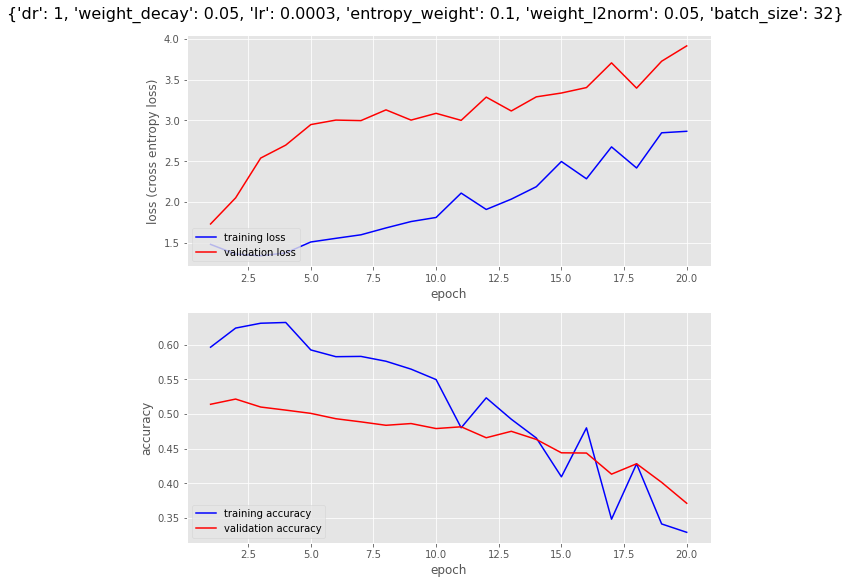

In [33]:
ROOT = "tuning"
directory_visualized = "only_SAFN/e2e"
plt.style.use('ggplot')
best_acc = 0
best_epoch = 0
best_params = {}
for file in os.listdir(os.path.join(ROOT,directory_visualized)):
  if os.path.isfile(os.path.join(ROOT,directory_visualized,file)):
    with open(os.path.join(ROOT,directory_visualized,file), "rb") as f:
      x = pickle.load(f)
      if "params" in x:
        params = x["params"]
      elif "wd" in x:
        params = x["wd"]
      else:
        params = None

      train_losses, val_losses, train_accs, val_accs = x["results"]

      best_acc_temp = max(val_accs)
      best_epoch_temp = np.argmax(val_accs) + 1

      if best_acc < best_acc_temp:
          best_acc = best_acc_temp
          best_epoch = best_epoch_temp
          best_params = params

      #print graph
      X = np.linspace(1, len(train_losses), len(train_losses))
      fig, axs = plt.subplots(2,1, constrained_layout=True, figsize=(8,8))
      fig.suptitle(params, fontsize=16)

      axs[0].plot(X, train_losses, "b", label="training loss")
      axs[0].plot(X, val_losses, "r", label="validation loss")
      axs[1].plot(X, train_accs,"b", label="training accuracy")
      axs[1].plot(X, val_accs, "r", label="validation accuracy")

      axs[0].set_xlabel("epoch")
      axs[0].set_ylabel("loss (cross entropy loss)")
      axs[0].legend(loc='lower left')
      axs[1].set_xlabel("epoch")
      axs[1].set_ylabel("accuracy")
      axs[1].legend(loc='lower left')

print("Best configuration found so far: {} accuracy: {} epoch: {}".format(best_params, best_acc, best_epoch))